# __Agenda__
- Introduction to Unsupervised Learning
  - What Is Unsupervised Learning?
  - Approaches to Unsupervised algorithm (Clustering, Dimensionality Reduction, Association rule )
- Clustering Techniques
  - Overview of Clustering
  - K-Means Clustering:
    - Algorithm and Implementation
    - Choosing the Number of Clusters (Elbow Method, Silhouette Score)
  - Hierarchical Clustering:
    - Agglomerative vs. Divisive Methods
    - Dendrograms and Linkage Criteria
  - DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

# __What Is Unsupervised Learning__
Unsupervised learning is a machine learning type where the model learns from unlabeled data to find patterns within it.

- It deals with unlabeled datasets.
- It enables algorithms to work independently to discover hidden information or pattern in the data without guidance.
- It classifies unsorted information according to patterns, differences, or similarities.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_06_Unsupervised_Learning/unsupervised_learning.png)

Unsupervised learning algorithms are used to detect the following in the data:
- Patterns
- Differences
- Similarities

In unsupervised learning, the model derives insights from the data without being taught anything.
- It uncovers several previously unknown patterns in the dataset.
- It helps in finding features that may be useful for categorization.

## __Approaches to Unsupervised Learning__

1. **Clustering:** This is a popular approach that groups data points into clusters based on their similarities. Common clustering algorithms include k-means, hierarchical clustering, and density-based clustering like DBSCAN.
2. **Dimensionality reduction:** This approach aims to reduce the number of features in a dataset while preserving the essential information. This can be useful for visualization and improving the efficiency of other machine learning algorithms. Principal component analysis (PCA) is a widely used dimensionality reduction technique.
3. **Association rule learning:** This approach discovers relationships between different variables in a large dataset. It helps identify items that frequently appear together, which can be valuable for tasks like market basket analysis. The Apriori algorithm is a common example of this approach.


  *Market basket analysis* is a data mining technique used by retailers to discover relationships between items that people buy together frequently. It's often leveraged in retail sales to identify strong correlations between products. A famous example of market basket analysis is the "diapers and beer" story, where it was found that these two products were often purchased together, leading to marketing strategies that placed these items closer to encourage further sales.

## Clustering Technique

Clustering is a technique in unsupervised learning where data points are grouped together based on their similarities, aiming to discover inherent patterns or structures within the data.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_06_Unsupervised_Learning/clustering.png)

- Clustering techniques divide a set of data points into multiple clusters, ensuring similarity within each cluster.
- Its goal is to segregate data points with similar traits.

The most common clustering algorithms used in unsupervised learning are:
- K-means clustering
- K-medoids
- Agglomerative clustering
- Density-based spatial clustering of applications with noise (DBSCAN)

## K-means clustering

K-means clustering is an unsupervised machine learning algorithm that partitions data into k clusters by minimizing the within-cluster variance.
- It groups unlabeled data into clusters by identifying the k number of centroids.
- It assigns every data point to the closest cluster by calculating and using the pairwise Euclidean distance between points.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/Unsupervised.png)


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/K_means.png)


### Steps
- Step 1. Select the number of clusters, k (e.g., k = 2 for demonstration).
- Step 2. Select k random points from the dataset as the initial centroids.
- Step 3. Calculate the Euclidean distance from each data point to each centroid.
- Step 4. Assign each data point to the nearest cluster centroid based on the calculated distances.
- Step 5. Recalculate the centroids of each cluster as the mean of all points assigned to that cluster.
- Step 6. Reassign each data point to the nearest centroid. If no data points change their cluster assignments or a maximum number of iterations is reached, stop; otherwise, return to Step 5.


In [1]:
## Let us implement K Means Clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
# Read the data

df = pd.read_csv('mall_customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X =  df[['Annual Income (k$)','Spending Score (1-100)']]

In [5]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


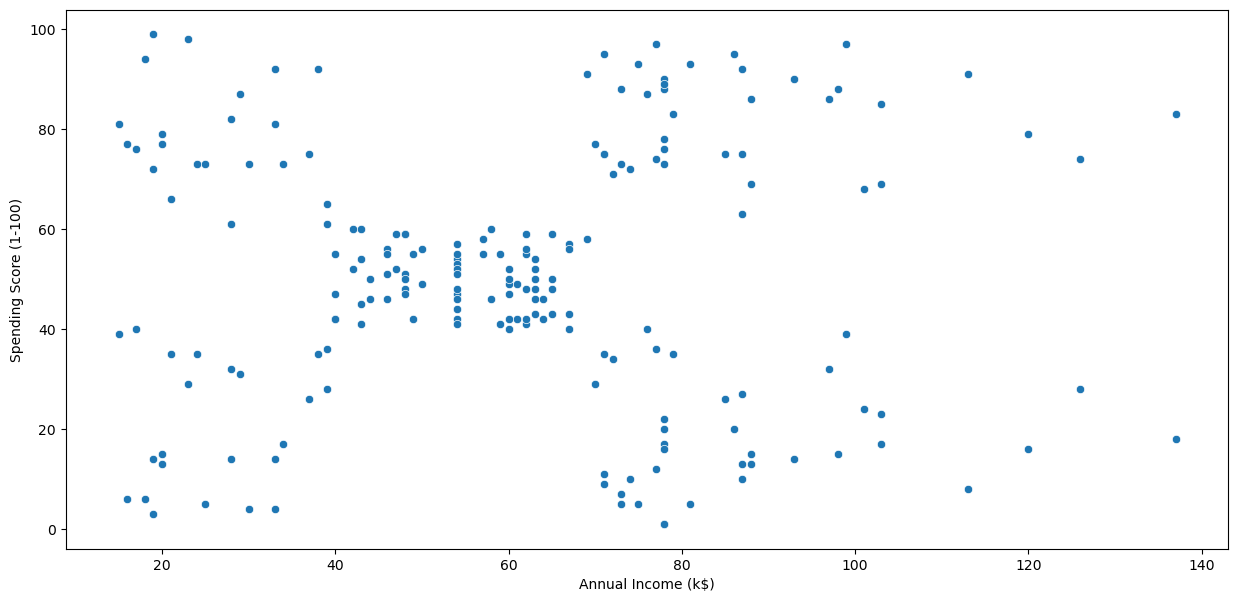

In [6]:
# let us plot a scatter plot for the data
plt.figure(figsize = (15,7))
sns.scatterplot(x = 'Annual Income (k$)' , y= 'Spending Score (1-100)', data=  X)
plt.show()

## The Elbow Method

- The elbow method involves plotting the number of clusters against the distortion or inertia to identify a significant flattening point, known as the elbow point.
- The elbow point represents a trade-off between capturing meaningful patterns and avoiding excessive complexity, indicating the optimal number of clusters.
- By choosing the value of k at the elbow point, you strike a balance between cluster quality and simplicity, resulting in a reasonable number of clusters.

**Steps to perform:**
- Calculate the WCSS (within-cluster sum of squares) for different numbers of clusters.
  - WCSS measures how compact a cluster is in k-means clustering. It calculates the total squared distance of all points within a cluster to their cluster's centroid. In simpler terms, it tells you how spread out the points are within a cluster.
  - The lower the WCSS, the closer the points are to their cluster's center.
- Plot the WCSS values to find the optimal number of clusters.

In [7]:
import warnings
warnings.filterwarnings('ignore')

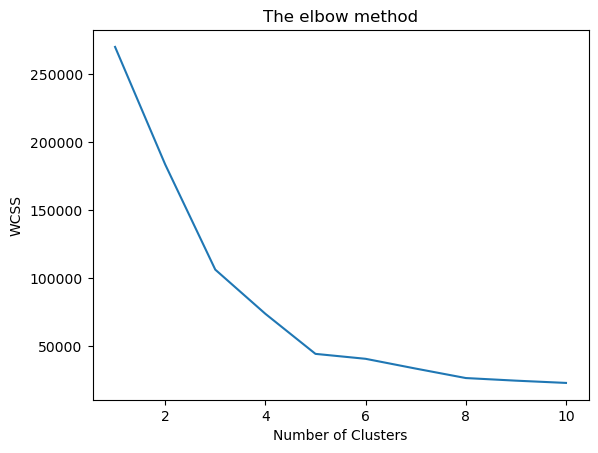

In [8]:
wcss = []
for i in range(1, 11):
    model =  KMeans(n_clusters = i, random_state = 42)
    model.fit(X)
    wcss.append(model.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

__Observation__
In the plotted graph, identify where the WCSS graph starts to flatten out. The plot flattens at 5. Hence this number is chosen as the Optimal `k`

In [9]:
model = KMeans(n_clusters = 5, random_state = 42)
y_kmeans =  model.fit_predict(X)

In [10]:
print(f'Centroids are : \n{model.cluster_centers_}')

Centroids are : 
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


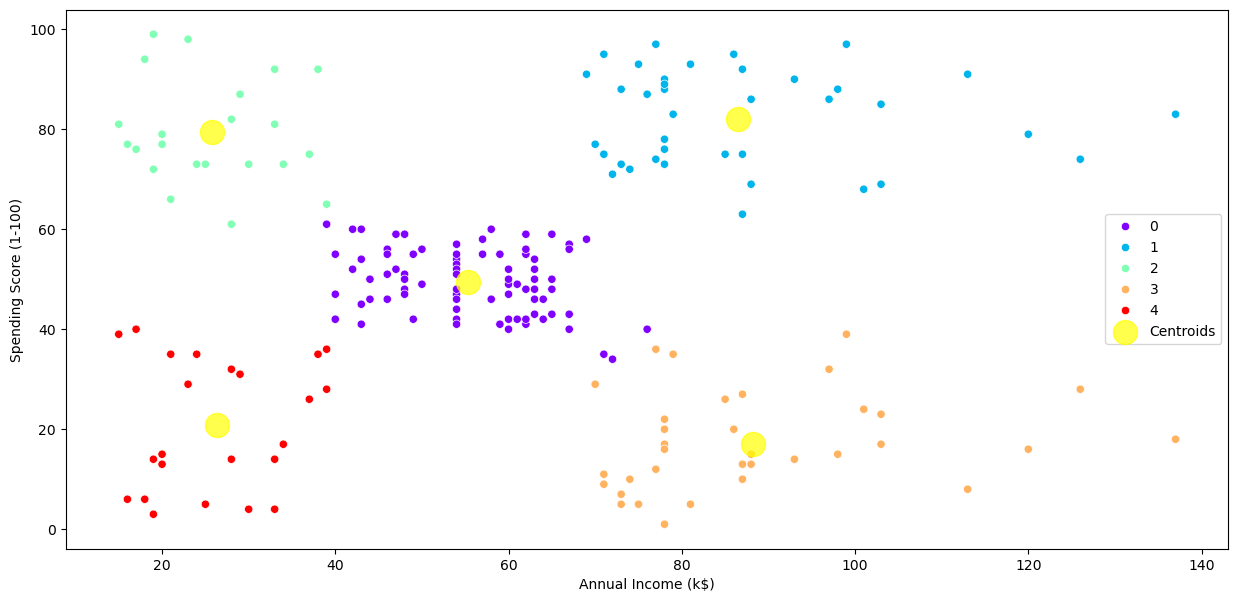

In [11]:
# let us plot a scatter plot for the data
plt.figure(figsize = (15,7))
sns.scatterplot(x = 'Annual Income (k$)' , y= 'Spending Score (1-100)', data=  X, hue =  y_kmeans, 
               palette = 'rainbow')
## Display centroids
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s =300, c= 'yellow', 
            label =  'Centroids', alpha = 0.7)
plt.legend()
plt.show()

## Performance metric for Kmeans Clustering - `Silhouette Score`

- Silhouette score measures how well data points fit their assigned cluster by considering both similarity within a cluster and separation between clusters.
- Measures the quality of clustering by comparing how similar an object is to its own cluster versus other clusters.
     - **Intra-cluster distance** is the average distance between points within the same cluster. A lower intra-cluster distance indicates that the cluster is more compact, which is generally desirable.
     - **Inter-cluster distance** measures the distance between clusters. Ideally, you want clusters to be as far apart as possible (high inter-cluster distance) to ensure that they are distinct from one another.
- The score ranges from -1 to 1.
  - **Close to 1:** Indicates that the object is well-clustered and appropriately assigned to its cluster.
  - **Close to 0:** Indicates that the object lies on or very close to the boundary between two clusters.
  - **Close to -1:** Indicates that the object is poorly clustered and may have been assigned to the wrong cluster.
    
**Note:**  The silhouette score is particularly useful for determining the optimal number of clusters k, in a dataset.

In [12]:
from sklearn.metrics import silhouette_score

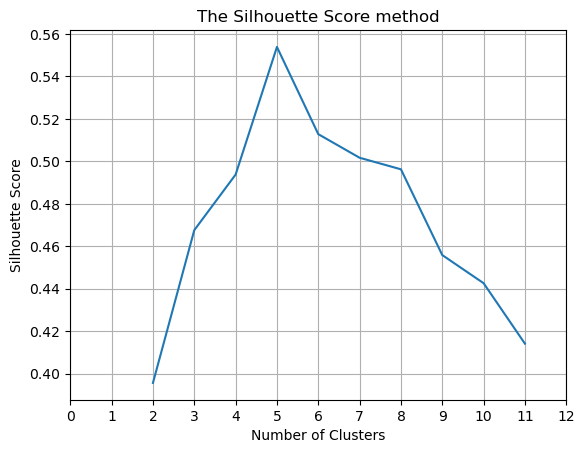

In [13]:
silhouette = []
for i in range(2, 12):
    model =  KMeans(n_clusters = i, random_state = 42)
    model.fit(X)
    score = silhouette_score(X, model.labels_)
    silhouette.append(score)

plt.plot(range(2,12), silhouette)
plt.title('The Silhouette Score method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(0,13))
plt.grid()
plt.show()

# Hierarchical Clustering
Hierarchical clustering is a method that groups data points based on their similarity or distance. It assumes that data points that are close to each other are more similar or related than those that are farther apart.

Hierarchical clustering, unlike K-Means, does not require specifying the number of clusters in advance. It builds a hierarchy of clusters based on the similarity or distance between data points, capturing complex and nested cluster shapes. This method provides a detailed view of data relationships through a dendrogram, making it more flexible for exploring the data's structure.

It adopts either of the following approaches for grouping data:
- Agglomerative Hierarchical Cluster Analysis: Bottom-to-top approach
- Divisive Hierarchical Cluster Analysis: Top-to-bottom approach

__Dendrograms and Linkage Criteria in Hierarchical Clustering__
**Dendrograms:**

A dendrogram is a tree-like diagram that displays the relationships between similar objects. Each branch represents a category or class, and the entire diagram shows the hierarchical structure connecting all the categories or classes. i

**Components of a Dendrogram**
- **Leaves (Terminal Nodes):** These represent the individual data points at the bottom of the dendrogram.
- **Branches (Internal Nodes):** These represent the clusters formed by merging or splitting. The height of the branches indicates the distance or dissimilarity between clusters.
- **Height:** The vertical axis of the dendrogram represents the distance or dissimilarity at which clusters are merged or split. A greater height indicates a higher dissimilarity.

**How to Read a Dendrogram**
- **Merging:** Starting from the leaves, data points that are close to each other are merged first, forming small clusters.
- **Splitting:** As you move up, these small clusters are further merged based on their distance or dissimilarity until all data points are combined into a single cluster at the root.
- **Cluster Formation:** By setting a threshold on the height, you can determine the number of clusters. Horizontal cuts across the dendrogram at a specific height level show the clusters formed at that dissimilarity level.

**Linkage Criteria:** It determines how the distance between clusters is calculated during the merging process. Different linkage methods can result in different clustering outcomes.

**Common Linkage Criteria**
1. **Single Linkage (Minimum Linkage):** The distance between two clusters is defined as the minimum distance between any single data point in one cluster and any single data point in the other cluster. It can lead to **chaining** effects, where clusters can form long, elongated shapes.
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/Single_linkage.png)

2. **Complete Linkage (Maximum Linkage):** The distance between two clusters is defined as the maximum distance between any single data point in one cluster and any single data point in the other cluster. It tends to create more compact and spherical clusters.
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/Complete_linkage.png)


3. **Average Linkage:** The distance between two clusters is defined as the average distance between all pairs of data points, one from each cluster. It provides a balance between single and complete linkage.
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/average_linkage.png)


4. **Centroid Linkage:** The distance between two clusters is defined as the distance between the centroids (mean points) of the clusters. It can be sensitive to the shapes of the clusters.
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/centroid_linkage.png)


Consider a dataset of n different types of animals.
- Assume that each animal is a distinct cluster by itself, that is, n clusters.
- Take the two closest data points and make them into a cluster. Now, there are n-1 clusters.
- Repeat the process as mammals are grouped into one cluster, reptiles into another, fish into a third cluster, and so on.
- Group mammals, reptiles, and fish into the vertebrate cluster and insects, corals, and arachnids into the invertebrate cluster.


Hierarchical clustering is the result of the of the creation of a tree-shaped structure known as a dendrogram.
- A dendrogram is a visual interpretation of the hierarchical connections between items.
- The goal is to find the best approach to assigning items to a cluster.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/dendrogram.png)


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/Choosing_no_of_clusters.png)


To choose the number of clusters to be created:
- Identify the longest line that traverses the maximum vertical distance without intersecting any of the merging points in the dendrogram.
- Draw a horizontal line where the line can traverse the maximum vertical distance without intersecting the merging point.
- The number of vertical lines it intersects is the optimal number of clusters.

## __Date: 24-07-2025__

In [19]:
# Taking from the last input X , the first 50 datatpoints 
df1 = X.iloc[:50, :]

In [20]:
df1.shape

(50, 2)

In [22]:
import scipy.cluster.hierarchy as shc

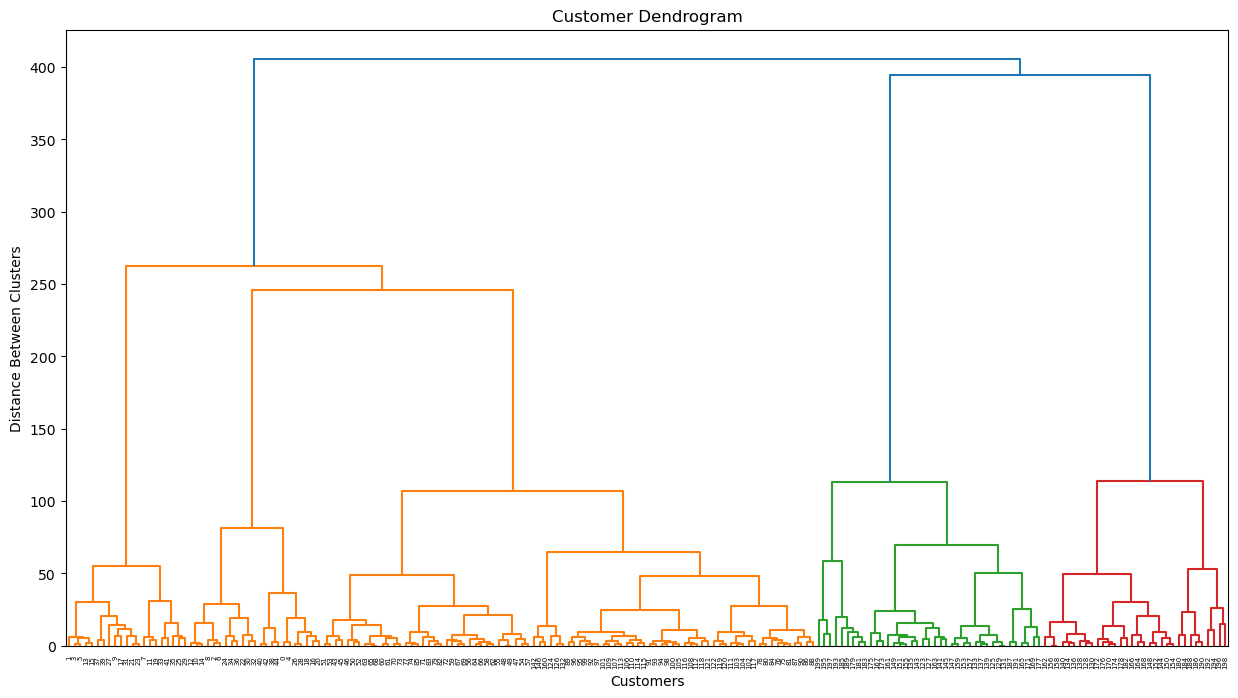

In [26]:
plt.figure(figsize = (15,8))
plt.title('Customer Dendrogram')
dend =  shc.dendrogram(shc.linkage(X, method = 'ward'))
plt.xlabel('Customers')
plt.ylabel('Distance Between Clusters')
plt.show()

Agglomerative hierarchical cluster analysis or the bottom-up approach, creates a more informative structure than flat clustering. This method doesn't require specifying the number of clusters beforehand. It starts with each data point as its own cluster and progressively merges pairs of clusters until all data points are combined into a single cluster.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/Agglomerative.png)

In [27]:
# Apply Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

In [28]:
model =  AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
labels_ =  model.fit_predict(X)

labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

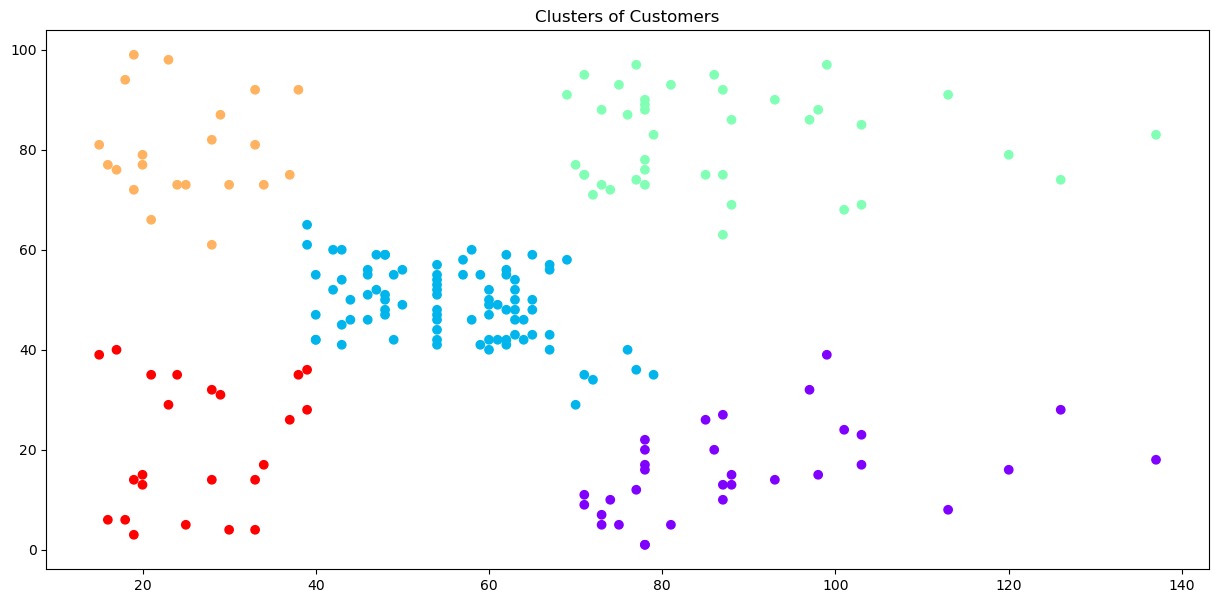

In [29]:
plt.figure(figsize = (15,7))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = model.labels_,cmap = 'rainbow')
plt.title('Clusters of Customers')
plt.show()

## Divisive  Clustering

*This* method, also called **top-down** clustering, begins with all data points in one large cluster. It then repeatedly splits this cluster into smaller sub-clusters based on their differences.
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Divisive.png)

## DBSCAN - Density Based Spatial Clustering of Applications with Noise

DBSCAN is a popular unsupervised machine learning algorithm primarily used for clustering tasks, where the goal is to group closely packed data points based on some notion of distance. It identifies points that are alone in low-density regions as outliers or noise.

- It does not require specifying the number of clusters a priori, unlike K-means.
- It can find arbitrarily shaped clusters that other clustering algorithms might not find.
- It is robust to outliers; points that don’t belong to a cluster are treated as noise.

In [31]:
from sklearn.cluster import DBSCAN

In [51]:
db =  DBSCAN(eps = 5, min_samples = 5)
labels_  = db.fit_predict(X)
labels_

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2, -1,  4, -1,  4, -1,
        2, -1,  4,  3,  2,  3,  2, -1,  4, -1,  4, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

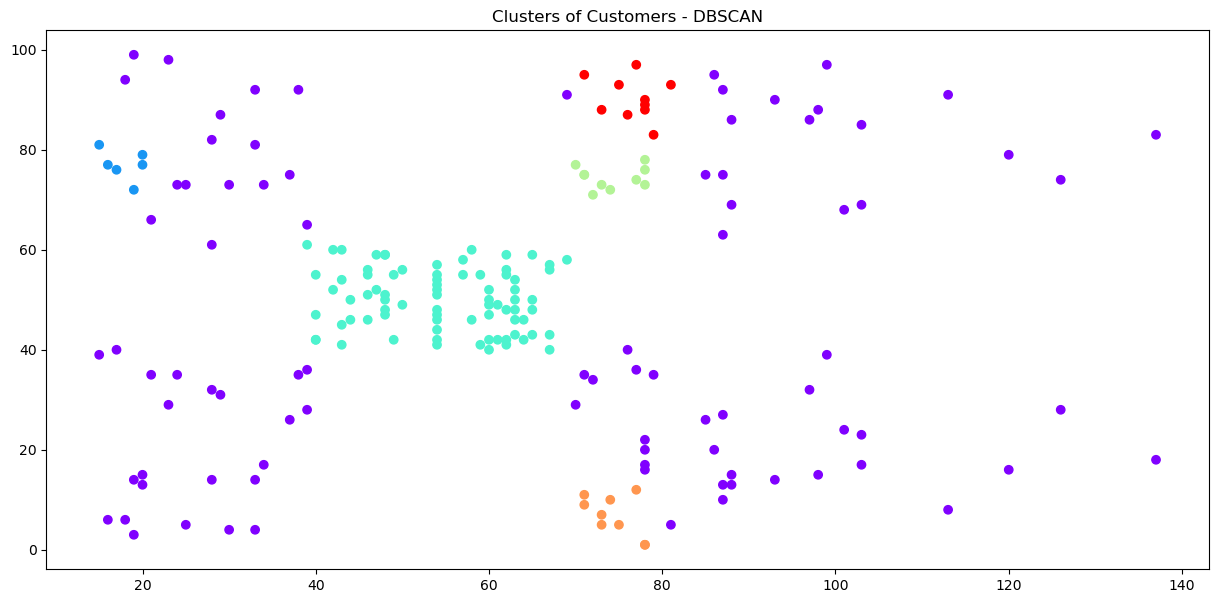

In [52]:
plt.figure(figsize = (15,7))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = labels_,cmap = 'rainbow')
plt.title('Clusters of Customers - DBSCAN')
plt.show()